## Equipe:
####Bento Guilherme Gomes Oliveira RA: 00000852680
####Lorenna Meneses de Almeida RA: 00000853511
####Arthur Amaral de Souza RA: 00000852603
####Lucas Fernandes Nunes Machado RA: 00000852836
####Lucas Mendes Nóbrega RA: 00000852727

# Projeto desenvolvido para resolver Interpolações com códigos em Python.

1- Código de Interpolação Linear

2- Código de Interpolação Quadrática

3- Código de Interpolação de Lagrange

4- Código de Interpolação Diferenças Divididas

5- Código com todas Interpolações para compará-las

6- Conclusão

# Interpolação Linear

In [19]:
x0, y0 = 1.0, 1.5
x1, y1 = 1.5, 2.0

def interpolacao_linear(x, x0, y0, x1, y1):
    return y0 + ((y1 - y0) / (x1 - x0)) * (x - x0)

x = 1.3
resultado = interpolacao_linear(x, x0, y0, x1, y1)
print(f"O valor interpolado em x = {x} é P1({x}) = {resultado}, usando interpolação linear.")

O valor interpolado em x = 1.3 é P1(1.3) = 1.8, usando interpolação linear.


# Interpolação Quadrática

In [18]:
def interpolacao_quadratica(x0, y0, x1, y1, x2, y2, x):
    A = [
        [x0**2, x0, 1],
        [x1**2, x1, 1],
        [x2**2, x2, 1]
    ]
    B = [y0, y1, y2]
    import numpy as np
    a, b, c = np.linalg.solve(A, B)
    return a*x**2 + b*x + c

x0, y0 = 1.0, 3.0
x1, y1 = 2.0, 6.0
x2, y2 = 4.0, 18.0

x = 3

resultado = interpolacao_quadratica(x0, y0, x1, y1, x2, y2, x)

print(f"Valor interpolado em x = {x}: {resultado}, interpolação quadrática.")

Valor interpolado em x = 3: 11.0, interpolação quadrática.


# Interpolação de Lagrange

In [17]:
def interpolacao_lagrange(x_pontos, y_pontos, x):
    total = 0
    n = len(x_pontos)
    for i in range(n):
        xi, yi = x_pontos[i], y_pontos[i]
        termo = yi
        for j in range(n):
            if i != j:
                termo *= (x - x_pontos[j]) / (xi - x_pontos[j])
        total += termo
    return total

x_pontos = [0, 1, 2]
y_pontos = [1, 3, 7]

x_teste = 1.5
y_resultado = interpolacao_lagrange(x_pontos, y_pontos, x_teste)

print(f"O valor interpolado em x = {x_teste} é: {y_resultado}, interpolação de lagrange.")

O valor interpolado em x = 1.5 é: 4.75, interpolação de lagrange.


# Interpolação de Diferenças Divididas

In [20]:
import numpy as np
import matplotlib.pyplot as plt


def diferencas_divididas(x, y):
    n = len(x)
    tabela = np.zeros((n, n))
    tabela[:, 0] = y

    for j in range(1, n):
        for i in range(n - j):
            tabela[i][j] = (tabela[i+1][j-1] - tabela[i][j-1]) / (x[i+j] - x[i])

    return tabela

def polinomio_newton(x, tabela, valor):
    n = len(x)
    resultado = tabela[0, 0]
    termo = 1.0

    for i in range(1, n):
        termo *= (valor - x[i-1])
        resultado += tabela[0, i] * termo

    return resultado

x = np.array([1.0, 2.0, 3.0])
y = np.array([2.0, 5.0, 10.0])

tabela = diferencas_divididas(x, y)
valor = 2.5

print(f"\nValor interpolado em x = {valor} é igual a: {polinomio_newton(x, tabela, valor)} utilizando as diferenças divididas.")



Valor interpolado em x = 2.5 é igual a: 7.25 utilizando as diferenças divididas.


# Comparação entre todas interpolações com os mesmos pontos

Resultado - Linear: 7.50, Iterações: 1, Tempo: 0.00007677 s
Resultado - Quadrática: 7.25, Iterações: 7, Tempo: 0.00018191 s
Resultado - Lagrange: 7.25, Iterações: 6, Tempo: 0.00008488 s
Resultado - Diferenças Divididas: 7.25, Iterações: 3, Tempo: 0.00014830 s




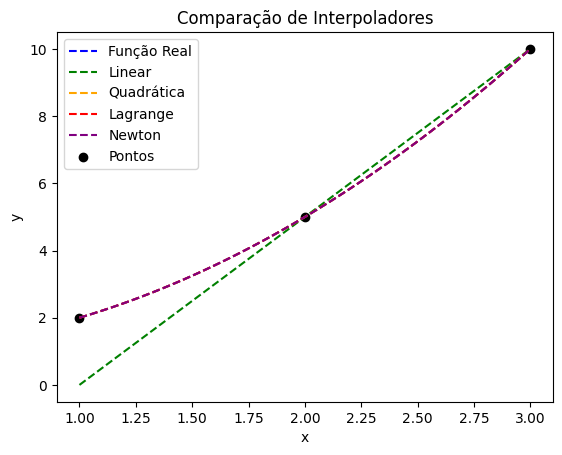

In [13]:
import numpy as np
import time
import matplotlib.pyplot as plt

x_pontos = np.array([1.0, 2.0, 3.0])
y_pontos = x_pontos**2 + 1
x = 2.5

def interpolacao_linear(x, x0, y0, x1, y1):
    iteracoes = 1
    resultado = y0 + ((y1 - y0) / (x1 - x0)) * (x - x0)
    return resultado, iteracoes

start = time.time()
linear, iter_linear = interpolacao_linear(x, x_pontos[1], y_pontos[1], x_pontos[2], y_pontos[2])
end = time.time()
tempo_linear = end - start
print(f"Resultado - Linear: {linear:.2f}, Iterações: {iter_linear}, Tempo: {tempo_linear:.8f} s")

def interpolacao_quadratica(x0, y0, x1, y1, x2, y2, x):
    iteracoes = 0
    A = [
        [x0**2, x0, 1],
        [x1**2, x1, 1],
        [x2**2, x2, 1]
    ]
    iteracoes += 3
    B = [y0, y1, y2]
    a, b, c = np.linalg.solve(A, B)
    iteracoes += 1
    resultado = a*x**2 + b*x + c
    iteracoes += 3
    return resultado, iteracoes

start = time.time()
quadratica, iter_quadratica = interpolacao_quadratica(x_pontos[0], y_pontos[0], x_pontos[1], y_pontos[1], x_pontos[2], y_pontos[2], x)
end = time.time()
tempo_quadratica = end - start
print(f"Resultado - Quadrática: {quadratica:.2f}, Iterações: {iter_quadratica}, Tempo: {tempo_quadratica:.8f} s")

def interpolacao_lagrange(x_pontos, y_pontos, x):
    total = 0
    n = len(x_pontos)
    iteracoes = 0
    for i in range(n):
        xi, yi = x_pontos[i], y_pontos[i]
        termo = yi
        for j in range(n):
            if i != j:
                termo *= (x - x_pontos[j]) / (xi - x_pontos[j])
                iteracoes += 1
        total += termo
    return total, iteracoes

start = time.time()
lagrange, iter_lagrange = interpolacao_lagrange(x_pontos, y_pontos, x)
end = time.time()
tempo_lagrange = end - start
print(f"Resultado - Lagrange: {lagrange:.2f}, Iterações: {iter_lagrange}, Tempo: {tempo_lagrange:.8f} s")

def diferencas_divididas(x, y):
    n = len(x)
    tabela = np.zeros((n, n))
    tabela[:, 0] = y
    iteracoes = 0
    for j in range(1, n):
        for i in range(n - j):
            tabela[i][j] = (tabela[i+1][j-1] - tabela[i][j-1]) / (x[i+j] - x[i])
            iteracoes += 1
    return tabela, iteracoes

def polinomio_newton(x, tabela, valor):
    n = len(x)
    resultado = tabela[0, 0]
    termo = 1.0
    for i in range(1, n):
        termo *= (valor - x[i-1])
        resultado += tabela[0, i] * termo
    return resultado

start = time.time()
tabela, iter_dd = diferencas_divididas(x_pontos, y_pontos)
newton = polinomio_newton(x_pontos, tabela, x)
end = time.time()
tempo_newton = end - start
print(f"Resultado - Diferenças Divididas: {newton:.2f}, Iterações: {iter_dd}, Tempo: {tempo_newton:.8f} s")
print(f"\n")

x_graf = np.linspace(1, 3, 100)
y_real = x_graf**2 + 1
y_linear = [interpolacao_linear(xi, x_pontos[1], y_pontos[1], x_pontos[2], y_pontos[2])[0] for xi in x_graf]
y_quadratica = [interpolacao_quadratica(x_pontos[0], y_pontos[0], x_pontos[1], y_pontos[1], x_pontos[2], y_pontos[2], xi)[0] for xi in x_graf]
y_newton = [polinomio_newton(x_pontos, tabela, xi) for xi in x_graf]

y_interp = []

for xi in x_graf:
    yi, _ = interpolacao_lagrange(x_pontos, y_pontos, xi)
    y_interp.append(yi)

plt.plot(x_graf, y_real, '--', label="Função Real", color='blue')
plt.plot(x_graf, y_linear, '--', label="Linear", color='green')
plt.plot(x_graf, y_quadratica, '--', label="Quadrática", color='orange')
plt.plot(x_graf, y_interp, '--', label="Lagrange", color='red')
plt.plot(x_graf, y_newton, '--', label="Newton", color='purple')
plt.scatter(x_pontos, y_pontos, color='black', label="Pontos")
plt.legend()
plt.xlabel("x")
plt.ylabel("y")
plt.title("Comparação de Interpoladores")
plt.show()

# Conclusão:

| **Método**            | **Vantagens**                                     | **Desvantagens**                                 |
|---------------------- |---------------------------------------------------|--------------------------------------------------|
| Linear                | Simples e rápido                                  | Pouca precisão para funções não lineares         |
| Quadrática            | Maior precisão com poucos pontos                  | Mais complexo, risco de sobreajuste              |
| Lagrange              | Exato para poucos pontos, simples de entender      | Alto custo computacional para muitos pontos      |
| Diferenças Divididas  | Fácil adicionar novos pontos                      | Implementação mais complexa, pode ser instável   |
